# 1. DATA UNDERSTANDING
## 1.1 Problem Statement
        Lending Club is a consumer finance company that specialises in providing various types of loans to urban customers. One of the critical challenges we face is making accurate loan approval decisions. The challenges are two ways:
        Loss of Business: If they reject a loan application from an applicant who is likely to repay, they miss out on potential business opportunities. This not only affects our revenue but also their market competitiveness.
        Financial Loss: On the other hand, if they approve a loan for an applicant who is likely to default, they risk incurring massive financial losses. Defaults can lead to a loss of the principal amount and the interest, which affects their overall financial health.

## 1.2 Objective
        The main objective is to identify patterns that indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. by using the (Exploratory Data Analysis )EDA on the dataset provided.

## 1.3 Understanding the Dataset

    The data set contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns that indicate| if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc.

    When a person applies for a loan, two types of decisions could be taken by the company:

    1. Loan Accepted: If the company approves the loan, there are three possible scenarios:
       Fully Paid: The applicant has fully paid the loan (the principal and the interest rate).
       Current: The applicant is in the process of paying the instalments, i.e., the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. 
       Charged-off: The applicant has not paid the instalments in due time for a long period, i.e., he/she has defaulted on the loan.
    
    2. Loan Rejected: The company rejects the loan because the candidate does not meet their requirements. Since the loan was rejected, there is no transactional history of those applicants with the company, and thus this data is not available in the dataset.

# 2. DATA CLEANING

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset file - loan.csv

In [2]:
# loan_df is the dataframe name, which is used to access the dataset i.e. from loan.csv
loan_df = pd.read_csv("loan.csv")

#### Displaying the first five rows of the dataset

In [3]:
# head() is used to display the top rows of the dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Checking the shape of the dataframe

In [4]:
# Shape is used to display the rows,columns in the dataset
loan_df.shape

(39717, 111)

#### Checking the datatypes of all the columns of the dataframe

In [5]:
#info displays the datatypes of all the columns of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Missing Value Treatment on the dataset

#### Check for the number of null values in the columns

In [6]:
# Display the number of null values in the columns
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### By excecuting the shape, we have identified that, there are 39717 columns and 111 rows.
#### From the excution of loan_df.isnull().sum(), we found there are columns which are completly filled with null values.

In [7]:
# Calculating the number of missing values in each column and saving into the variable - 'missing_values'
missing_values = loan_df.isnull().sum()

# Filtering columns that are completely filled with null values and saving into the varaible - 'columns_with_nulls'
columns_with_nulls = missing_values[missing_values == 39717]

# Printing the final output
print(f"There are {len(columns_with_nulls)} columns in the dataset which are completely filled with null values. \n\nThe list of the columns as follows: \n")
print(columns_with_nulls)

There are 54 columns in the dataset which are completely filled with null values. 

The list of the columns as follows: 

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              3971

#### Droping the columns which are filled with null values as they don`t add any value to the analysis

In [8]:
# droping the columns which are completely empty and rediricting to a new dataframe "loan_df_cleaned".
loan_df_cleaned = loan_df.dropna(axis=1, how='all')

#### Filtering the Columns which have atleast one missing value

In [9]:
# Calculating the number of missing values in each column after droping the columns filled with only Null values into variable - 'missing_values2'
missing_values2 = loan_df_cleaned.isnull().sum()

# Filtering the columns that have at least one missing value and saving into variable - 'columns_with_nulls2'
columns_with_nulls2 = missing_values2[missing_values2 > 0]

# Printing the final output information
print(f"There are {len(columns_with_nulls2)} columns in the dataset which has atleast one missing value. \n\nThe list of the columns as follows: \n")
print(columns_with_nulls2)

There are 14 columns in the dataset which has atleast one missing value. 

The list of the columns as follows: 

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64


<br>
<br>

#### Droping the columns
We are retaining the columns __'emp_title', 'emp_length', and 'pub_rec_bankruptcies'__ and droping the other columns from the dataset.<br> 
The list of colums which we are droping is as follows:<br>
__'desc',<br>__
__'title',<br>__
__'mths_since_last_delinq',<br>__
__'mths_since_last_record',<br>__
__'revol_util',<br>__
__'last_pymnt_d',<br>__
__'next_pymnt_d',<br>__
__'last_credit_pull_d',<br>__
__'collections_12_mths_ex_med',<br>__
__'chargeoff_within_12_mths',<br>__
__'tax_liens'<br>__

In [10]:
# Creating a list for storing all the columns which we are droping and named it - drop_list_cols
drop_list_cols = ['desc',
'title',
'mths_since_last_delinq',
'mths_since_last_record',
'revol_util',
'last_pymnt_d',
'next_pymnt_d',
'last_credit_pull_d',
'collections_12_mths_ex_med',
'chargeoff_within_12_mths',
'tax_liens']

In [11]:
# Droping the columns from the list named - "drop_list_cols":
for i in drop_list_cols:
    loan_df_cleaned = loan_df_cleaned.drop(columns=[i])

# Display the DataFrame after dropping the columns listed in the drop_list_cols
print("\nDataFrame after dropping the columns:")
loan_df_cleaned


DataFrame after dropping the columns:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,0,0,NaN


In [12]:
loan_df_cleaned.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prnc

#### Droping the columns which doesn't contribute to the analysis.

The list of colums which we are droping from the dataset are as follows:<br>
__"acc_now_delinq",<br>__
__"application_type",<br>__
__"collection_recovery_fee",<br>__
__"delinq_2yrs",<br>__
__"delinq_amnt",<br>__
__"earliest_cr_line",<br>__
__"emp_title",<br>__
__"id",<br>__
__"initial_list_status",<br>__
__"inq_last_6mths",<br>__
__"last_pymnt_amnt",<br>__
__"member_id",<br>__
__"open_acc",<br>__
__"out_prncp",<br>__
__"out_prncp_inv",<br>__
__"policy_code",<br>__
__"pymnt_plan",<br>__
__"recoveries",<br>__
__"revol_bal",<br>__
__"total_acc",<br>__
__"total_pymnt",<br>__
__"total_pymnt_inv",<br>__
__"total_rec_int",<br>__
__"total_rec_late_fee",<br>__
__"total_rec_prncp",<br>__
__"zip_code",<br>__
__"url"__

In [13]:
drop_list_cols2 =["acc_now_delinq",
"application_type",
"collection_recovery_fee",
"delinq_2yrs",
"delinq_amnt",
"earliest_cr_line",
"emp_title",
"id",
"initial_list_status",
"inq_last_6mths",
"last_pymnt_amnt",
"member_id",
"open_acc",
"out_prncp",
"out_prncp_inv",
"policy_code",
"pymnt_plan",
"recoveries",
"revol_bal",
"total_acc",
"total_pymnt",
"total_pymnt_inv",
"total_rec_int",
"total_rec_late_fee",
"total_rec_prncp",
"url",
"zip_code"]

In [14]:
# Droping the columns from the list named - "drop_list_cols2":
for i in drop_list_cols2:
    loan_df_cleaned = loan_df_cleaned.drop(columns=[i])

# Display the DataFrame after dropping the columns listed in the drop_list_cols2
print("\nDataFrame after dropping the columns:")
loan_df_cleaned


DataFrame after dropping the columns:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


#### Droping the rows from the Column - loan_status, whose value is "Current". 
The reason is that the Applicants are in the process of paying their instalments.<br> The tenure of the loan is not yet completed.<br> These applicants are not labelled as 'defaulted'.<br> So, we are droping these rows as they don't contribute to the analysis.

In [15]:
loan_df_cleaned = loan_df_cleaned[loan_df_cleaned.loan_status != 'Current']
print("\nDataFrame after dropping the rows:")
loan_df_cleaned


DataFrame after dropping the rows:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


### Fixing the Columns data

#### Stripping the string 'months' from the values under the column 'term' and converting it into an integer.

In [16]:
loan_df_cleaned['term'] = loan_df_cleaned['term'].apply(lambda x: int(x.replace('months', '').strip()))
loan_df_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,8500,8500,875.0,36,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,5000,5000,1325.0,36,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,5000,5000,650.0,36,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


#### Stripping the percentage(%) symbol from the values under the column 'int_rate' and converting it into a float.

In [17]:
loan_df_cleaned['int_rate'] = loan_df_cleaned['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))
loan_df_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


#### home_ownership - change the value from NONE to OTHER to Normalise the values

In [18]:
# Listing the count of values in the column - 'home_ownership'
loan_df_cleaned['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [19]:
# Replace 'NONE' with 'OTHER' in the 'home_ownership' column
loan_df_cleaned['home_ownership'] = loan_df_cleaned['home_ownership'].replace('NONE','OTHER')
loan_df_cleaned['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

#### verification_status - change the value from 'Source Verified' to 'Verified' to Normalise the values

In [20]:
# Listing the count of values in the column - 'verification_status'
loan_df_cleaned['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [21]:
# Replace 'Source Verified' with 'Verified' in the 'verification_status' column
loan_df_cleaned['verification_status'] = loan_df_cleaned['verification_status'].replace('Source Verified','Verified')
loan_df_cleaned['verification_status'].value_counts()

verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

In [24]:
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            37544 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

#### Rounding of the values of columns with float datatype to two decimal places.

In [25]:
# Rounding of the values of below columns to two decimal places
for cols in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'installment','annual_inc']:
    loan_df_cleaned[cols] = loan_df_cleaned[cols].apply(lambda x: round(x, 2))

#### Restructiong the emp_length column values to integer values.
"10+ years": 10,<br>
"< 1 year": 0,<br>
"1 year": 1,<br>
"2 years": 2,<br>
"3 years": 3,<br>
"4 years": 4,<br>
"5 years": 5,<br>
"6 years": 6,<br>
"7 years": 7,<br>
"8 years": 8,<br>
"9 years": 9<br>

In [26]:
# Creating a dictionary to save the values which need to be modified.
emp_mapping_dict1 = {
"10+ years": 10,
"< 1 year": 0,
"1 year": 1,
"2 years": 2,
"3 years": 3,
"4 years": 4,
"5 years": 5,
"6 years": 6,
"7 years": 7,
"8 years": 8,
"9 years": 9}


In [27]:
# replaceing the emp_length column valuse by mapping the dictonary - emp_mapping_dict1
loan_df_cleaned['emp_length'] = loan_df_cleaned['emp_length'].replace(emp_mapping_dict1)

In [28]:
# Filling the null values in the column with '0'
loan_df_cleaned['emp_length'] = loan_df_cleaned['emp_length'].fillna(0).astype(int)

In [29]:
#Droping the null values from the column - pub_rec_bankruptcies as there are no records of bankruptcies for the applicant and it will not add any value to the analysis
loan_df_cleaned = loan_df_cleaned[~loan_df_cleaned['pub_rec_bankruptcies'].isnull()]


### The Dataset with no null values and ready for analysis

In [30]:
loan_df_cleaned.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec                 0
pub_rec_bankruptcies    0
issue_month             0
issue_year              0
dtype: int64

### REMOVING OUTLINERS

#### Calculating the outliner values for the following columns:
'int_rate',<br>
'dti', <br>
'installment', <br>
'funded_amnt_inv', <br>
'annual_inc',<br>
'loan_amnt',<br>
'annual_inc'<br>

In [31]:
#created a list named - outliner_list to save the column names for which outliners need to be calculated
outliner_list = ['int_rate', 'dti', 'installment', 'funded_amnt_inv', 'annual_inc','loan_amnt']

In [32]:
#Calculating the lower bound and upper bound values using Q1 Q3,IRQ and remove the otliners from the columns in the dataframe

for col in outliner_list:
    Q1 = loan_df_cleaned[col].quantile(0.25)
    Q3 = loan_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    loan_df_cleaned = loan_df_cleaned[(loan_df_cleaned[col] >= lower_bound) & (loan_df_cleaned[col] <= upper_bound)]

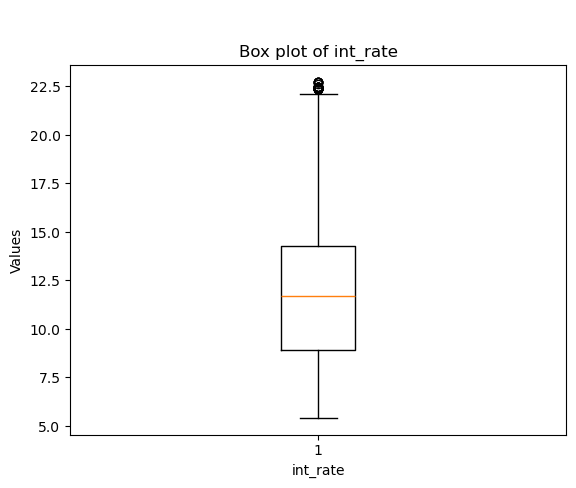

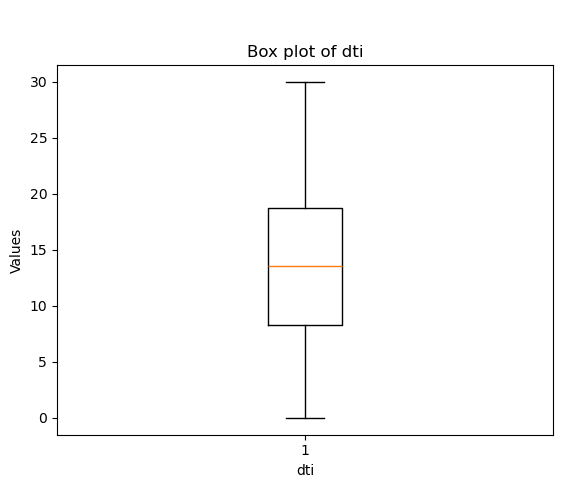

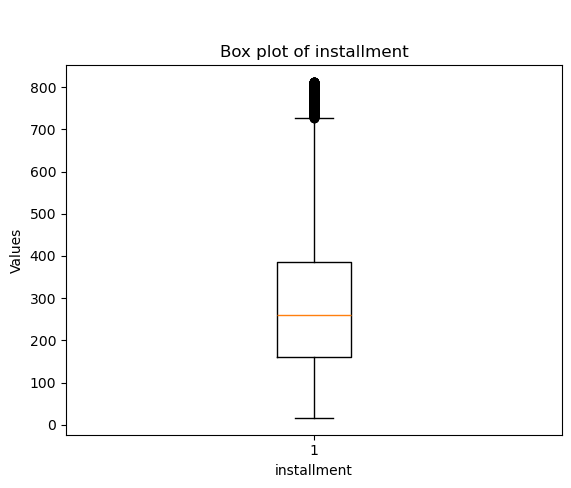

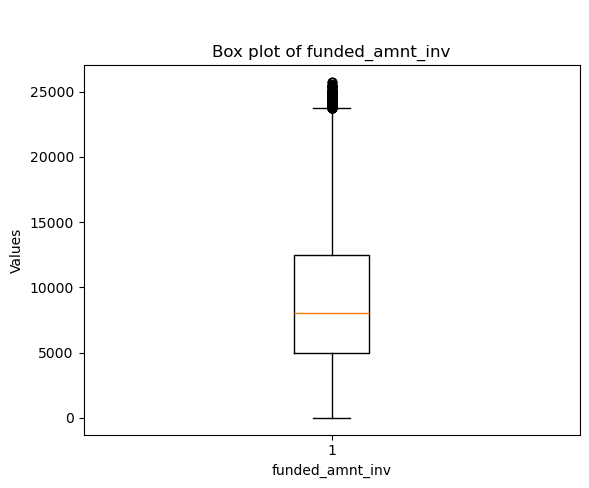

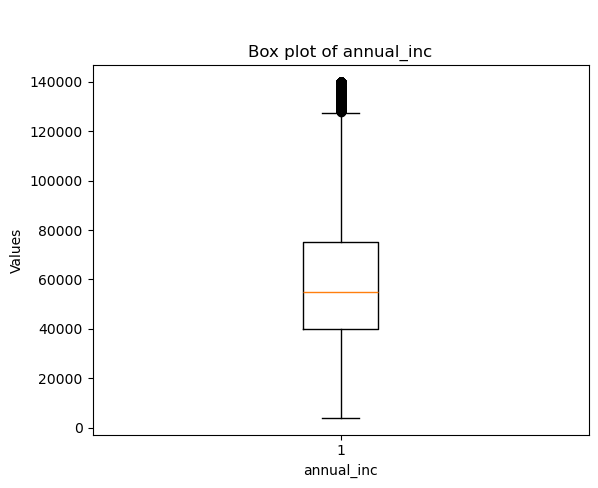

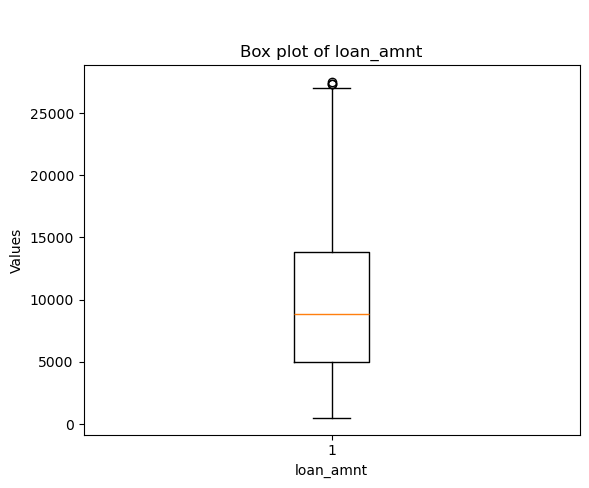

In [33]:
# Ploting the box plot for the columns listed in the outliner_list:
for col in outliner_list:
    plt.title(f"\n\nBox plot of {col}")
    plt.boxplot(loan_df_cleaned[col])
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

In [34]:
for col in outliner_list:
    print(f"\n\nThe statistics information of {col} is:\n{loan_df_cleaned[col].describe()}")



The statistics information of int_rate is:
count    34362.000000
mean        11.748819
std          3.601205
min          5.420000
25%          8.900000
50%         11.710000
75%         14.250000
max         22.740000
Name: int_rate, dtype: float64


The statistics information of dti is:
count    34362.000000
mean        13.445052
std          6.663582
min          0.000000
25%          8.332500
50%         13.550000
75%         18.727500
max         29.990000
Name: dti, dtype: float64


The statistics information of installment is:
count    34362.000000
mean       287.512547
std        165.218901
min         16.080000
25%        159.740000
50%        259.500000
75%        386.700000
max        812.540000
Name: installment, dtype: float64


The statistics information of funded_amnt_inv is:
count    34362.000000
mean      9227.274017
std       5578.169222
min          0.000000
25%       4988.542500
50%       8000.000000
75%      12475.000000
max      25750.000000
Name: funded_amnt_in

In [35]:
loan_df_cleaned.funded_amnt.describe()

count    34362.000000
mean      9607.572318
std       5639.471840
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      27500.000000
Name: funded_amnt, dtype: float64

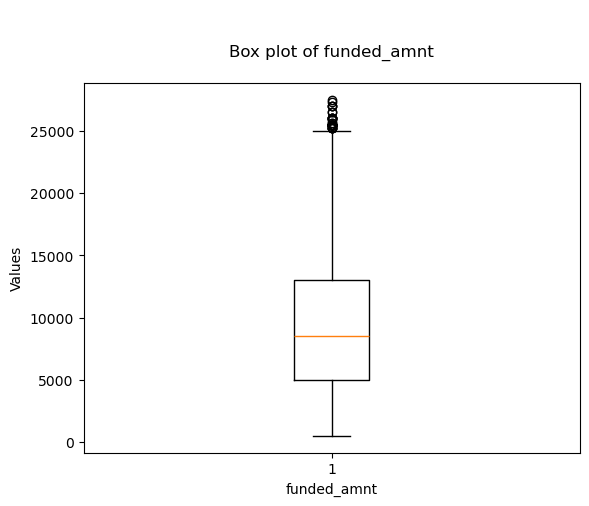

In [36]:
plt.title(f"\n\nBox plot of funded_amnt\n")
plt.boxplot(loan_df_cleaned['funded_amnt'])
plt.xlabel('funded_amnt')
plt.ylabel('Values')
plt.show()

# DATA ANALYSIS

### Derived Variables

#### issue_d - Converting the values into date format. Spliting the values into new columns month and Year seperately.

In [23]:
# Convert 'issue_d' to DateTime format (yyyy-mm-dd)
loan_df_cleaned['issue_d'] = pd.to_datetime(loan_df_cleaned['issue_d'], format='%b-%y')

# Stripping the month from the column 'issue_d' and Create a new column 'issue_month' in the dataset.
loan_df_cleaned['issue_month'] = loan_df_cleaned['issue_d'].dt.month

# Stripping the year from the column 'issue_d' and Create a new column 'issue_year' in the dataset.
loan_df_cleaned['issue_year'] = loan_df_cleaned['issue_d'].dt.year

#### Creating Bins(ranges) for the following columns:
annual_inc
loan_amount
int_rate
dti
funded_amnt

we are taking the range values for the columns between minimum and maximum values.

##### Creating Bin ranges for 'annual_inc' by creating a new column 'annual_inc_bin'

In [38]:
# Define the bin ranges and labels for annual_inc
bins = [0, 20000, 40000, 60000, 80000, float('inf')]
labels = ['0 - 20K', '20K - 40K', '40K - 60K', '60K - 80K', '80K and Above']

# Create a new column annual_inc_bin with the bin ranges
loan_df_cleaned['annual_inc_bin'] = pd.cut(loan_df_cleaned['annual_inc'], bins=bins, labels=labels, right=False)

In [39]:
loan_df_cleaned['annual_inc_bin']

0        20K - 40K
1        20K - 40K
2          0 - 20K
3        40K - 60K
5        20K - 40K
           ...    
39562    20K - 40K
39573    60K - 80K
39623    20K - 40K
39666    40K - 60K
39680    20K - 40K
Name: annual_inc_bin, Length: 34362, dtype: category
Categories (5, object): ['0 - 20K' < '20K - 40K' < '40K - 60K' < '60K - 80K' < '80K and Above']

#### Creating Bin ranges for 'loan_amnt' by creating a new column 'loan_amnt_bin'

In [40]:
# Define the bin ranges and labels for loan_amnt
bins = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]
labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - 20K', '20K - 25K', '25K and Above']

# Create a new column loan_amnt_bin with the bin ranges
loan_df_cleaned['loan_amnt_bin'] = pd.cut(loan_df_cleaned['loan_amnt'], bins=bins, labels=labels, right=False)

In [41]:
loan_df_cleaned['loan_amnt_bin']

0         5K - 10K
1           0 - 5K
2           0 - 5K
3        10K - 15K
5         5K - 10K
           ...    
39562       0 - 5K
39573     5K - 10K
39623     5K - 10K
39666    15K - 20K
39680       0 - 5K
Name: loan_amnt_bin, Length: 34362, dtype: category
Categories (6, object): ['0 - 5K' < '5K - 10K' < '10K - 15K' < '15K - 20K' < '20K - 25K' < '25K and Above']

#### Creating Bin ranges for 'int_rate' by creating a new column 'int_rate_bin'

In [42]:
# Define the bin ranges and labels for int_rate
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0 - 5%', '5% - 10%', '10% - 15%', '15% - 20%', '20% and Above']

# Create a new column int_rate_bin with the bin ranges
loan_df_cleaned['int_rate_bin'] = pd.cut(loan_df_cleaned['int_rate'], bins=bins, labels=labels, right=False)

In [43]:
loan_df_cleaned['int_rate_bin']

0        10% - 15%
1        15% - 20%
2        15% - 20%
3        10% - 15%
5         5% - 10%
           ...    
39562    10% - 15%
39573    10% - 15%
39623    10% - 15%
39666    10% - 15%
39680    10% - 15%
Name: int_rate_bin, Length: 34362, dtype: category
Categories (5, object): ['0 - 5%' < '5% - 10%' < '10% - 15%' < '15% - 20%' < '20% and Above']

#### Creating Bin ranges for 'dti' by creating a new column 'dti_bin'

In [44]:
# Define the bin ranges and labels for dti
bins = [0, 10, 20, 30, float('inf')]
labels = ['0 - 10%', '10% - 20%', '20% - 30%','30% and Above']

# Create a new column dti_bin with the bin ranges
loan_df_cleaned['dti_bin'] = pd.cut(loan_df_cleaned['dti'], bins=bins, labels=labels, right=False)

In [45]:
loan_df_cleaned['int_rate_bin']

0        10% - 15%
1        15% - 20%
2        15% - 20%
3        10% - 15%
5         5% - 10%
           ...    
39562    10% - 15%
39573    10% - 15%
39623    10% - 15%
39666    10% - 15%
39680    10% - 15%
Name: int_rate_bin, Length: 34362, dtype: category
Categories (5, object): ['0 - 5%' < '5% - 10%' < '10% - 15%' < '15% - 20%' < '20% and Above']

## Univariate Analysis

##### We have identified the variables as following catagories:

##### Ordered Categorical Variable
emp_length<br>
grade<br>
issue_d<br>
pub_rec<br>
pub_rec_bankruptcies<br>
sub_grade<br>
term<br>
<br>
##### unordered Categorical Variable
addr_state<br>
emp_title<br>
home_ownership<br>
loan_status<br>
purpose<br>
verification_status<br>
<br>
##### Quantitative Variable
annual_inc<br>
dti<br>
funded_amnt<br>
funded_amnt_inv<br>
installment<br>
int_rate<br>
loan_amnt<br>
annual_inc_bin<br>
loan_amnt_bin<br>
int_rate_bin<br>
dti_bin<br>

In [46]:
def create_plot_bar(df, column, title='Bar Plot', xlabel='X-axis', ylabel='Y-axis'):
    """
    Function to plot a bar plot.
    
    Parameters:
    df (dataframe): A list of values for the bars.
    title (str): The title of the plot. Default is 'Bar Plot'.
    xlabel (str): The label for the x-axis. Default is 'X-axis'.
    ylabel (str): The label for the y-axis. Default is 'Y-axis'.
    
    Returns:
    None
    """

    #Filtering the dataframe with the value 'Charged off" from the column"loan_status" and updating the existing dataframe
    df = df[df['loan_status']=="Charged Off"]

    # Calulating the count of value and storing in the variable - "col"
    col = df[column].value_counts()
    
    # Creating a colormap
    cmap = plt.get_cmap('magma')
    colors = [cmap(i / len(col)) for i in range(len(col))]

    # Creating a bar plot with the colormap
    plt.figure(figsize=(10, 6))
    col.plot(kind = 'bar', color=colors)

    # Displaying the value on the top of each bin
    for i, value in enumerate(col):
        plt.text(i, value + 0.1, str(value), ha='center')

    # Adding labels and title to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Showing the plot
    plt.show()

#### Creating plots for the following Categorical ordered variables  of the dataset by filtering based on the loan_status equal to charged off:

term<br>
grade<br>
sub_grade<br>
issue_month<br>
issue_year<br>
emp_length<br>


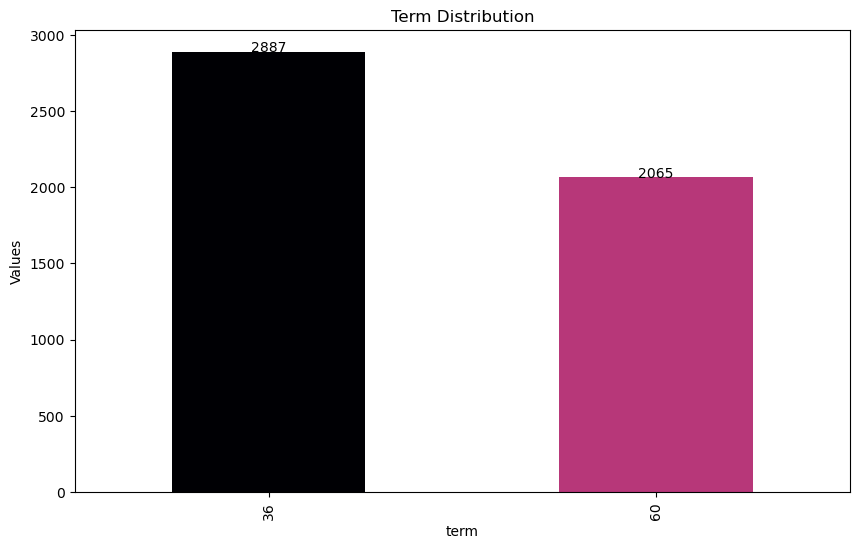

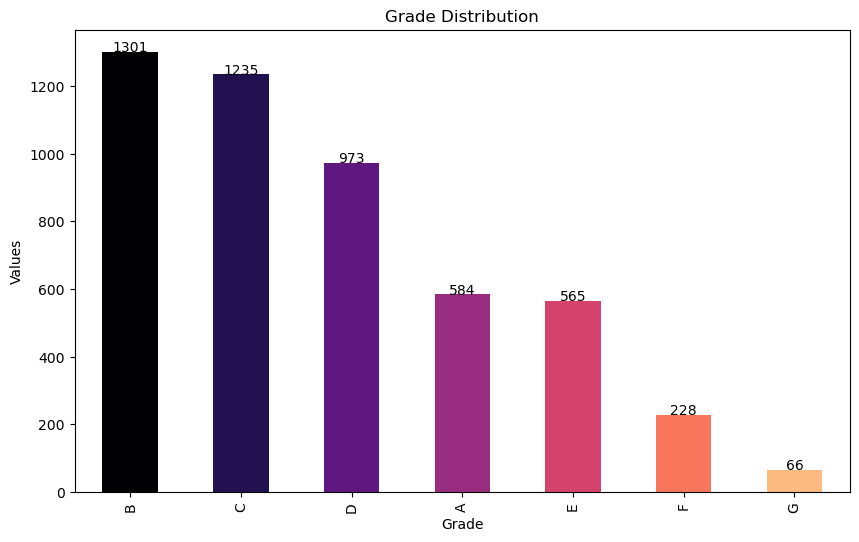

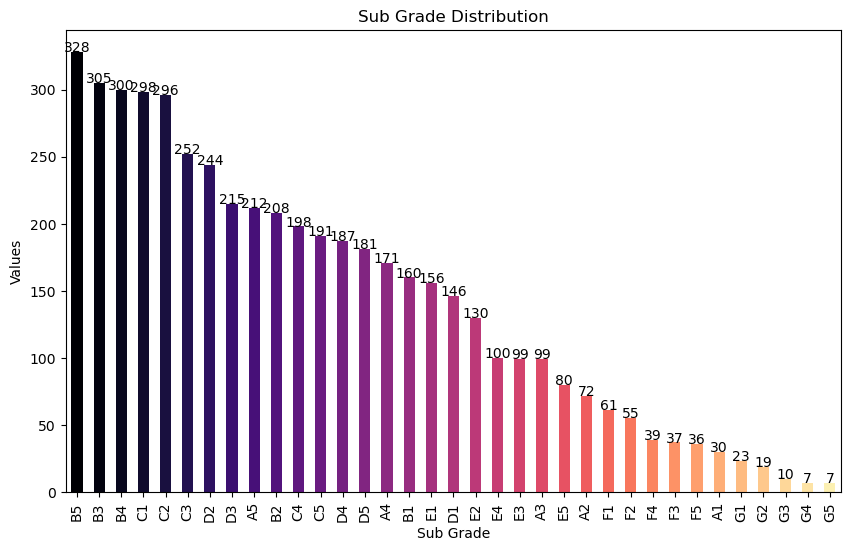

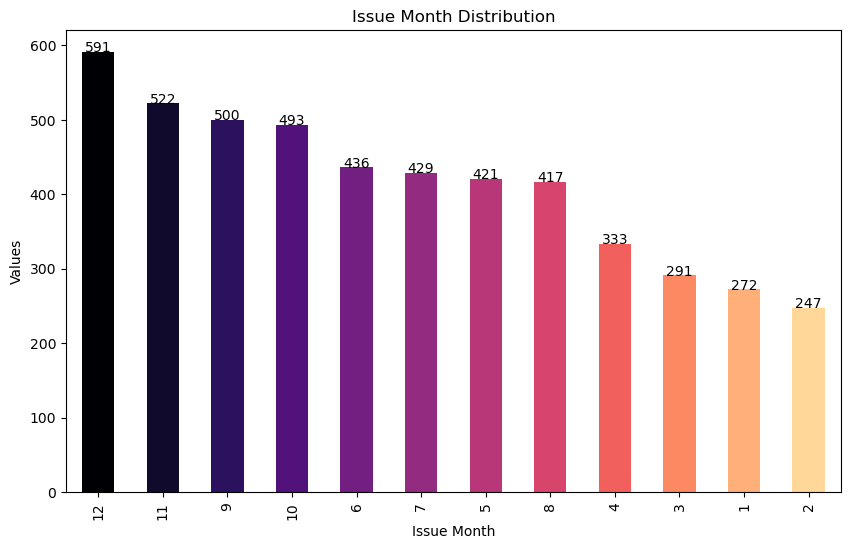

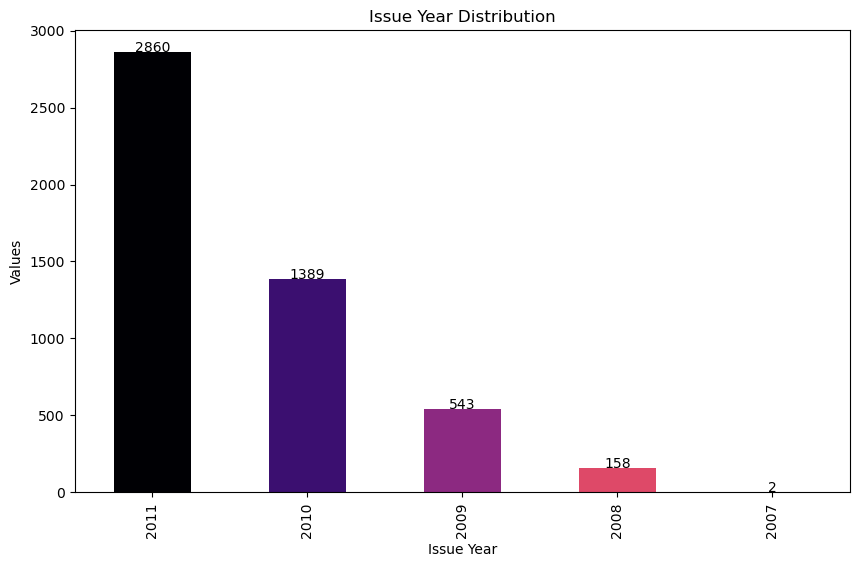

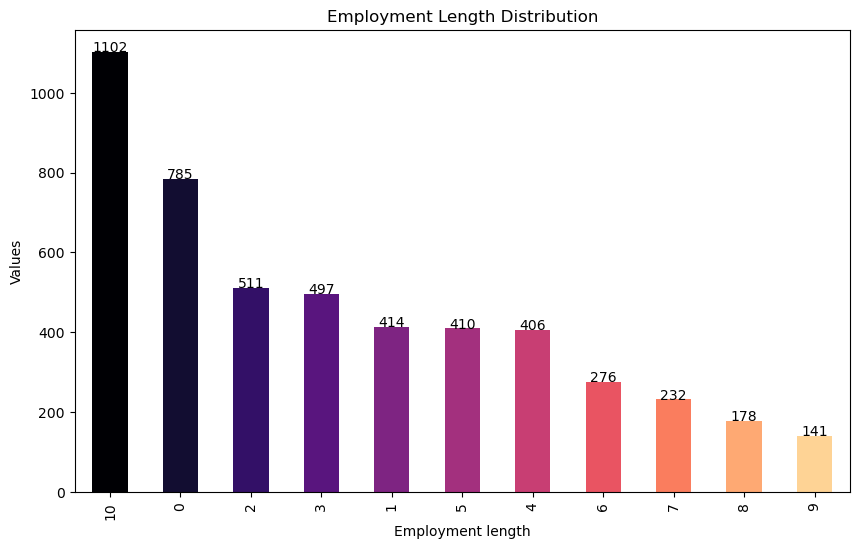

In [47]:
# ploting the bar graph for the column "term"
create_plot_bar(loan_df_cleaned,column="term", title='Term Distribution', xlabel='term', ylabel='Values')

# ploting the bar graph for the column "grade"
create_plot_bar(loan_df_cleaned,column="grade", title='Grade Distribution', xlabel='Grade', ylabel='Values')

# ploting the bar graph for the column "sub_grade"
create_plot_bar(loan_df_cleaned,column="sub_grade", title='Sub Grade Distribution', xlabel='Sub Grade', ylabel='Values')

# ploting the bar graph for the column "issue_month"
create_plot_bar(loan_df_cleaned,column="issue_month", title='Issue Month Distribution', xlabel='Issue Month', ylabel='Values')

# ploting the bar graph for the column "issue_year"
create_plot_bar(loan_df_cleaned,column="issue_year", title='Issue Year Distribution', xlabel='Issue Year', ylabel='Values')

# ploting the bar graph for the column "emp_length"
create_plot_bar(loan_df_cleaned,column="emp_length", title='Employment Length Distribution', xlabel='Employment length', ylabel='Values')

#### Creating plots for the following Categorical ordered variables  of the dataset by filtering based on the loan_status equal to charged off:

home_ownership<br>
verification_status<br>
loan_status<br>
purpose<br>
addr_state<br>

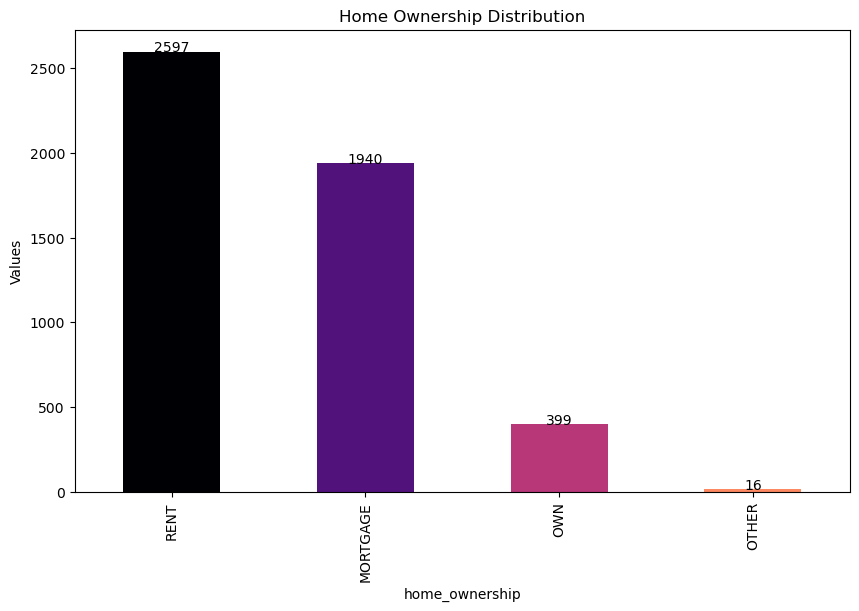

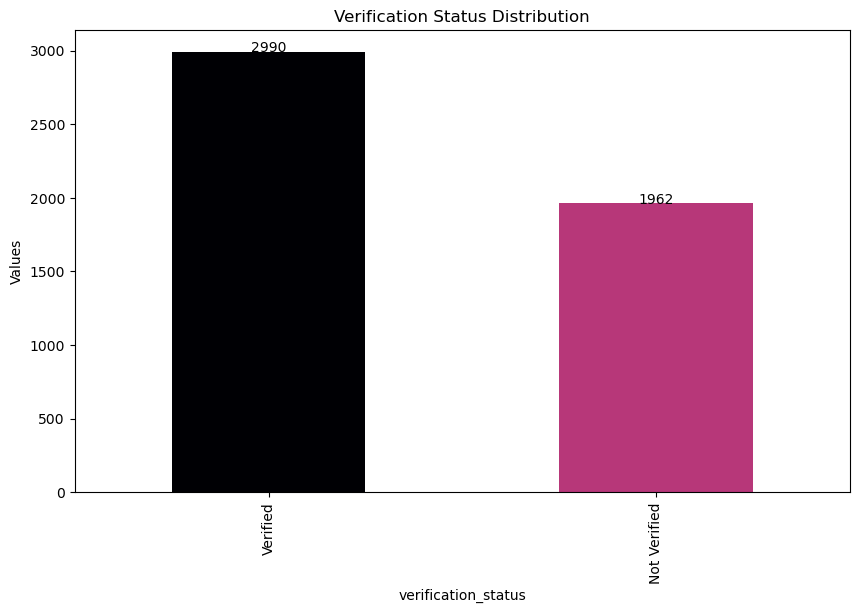

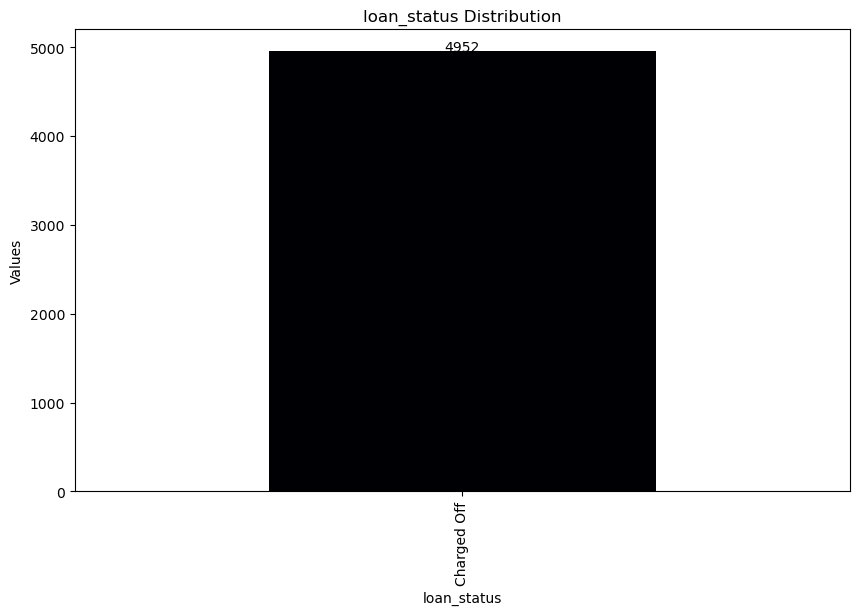

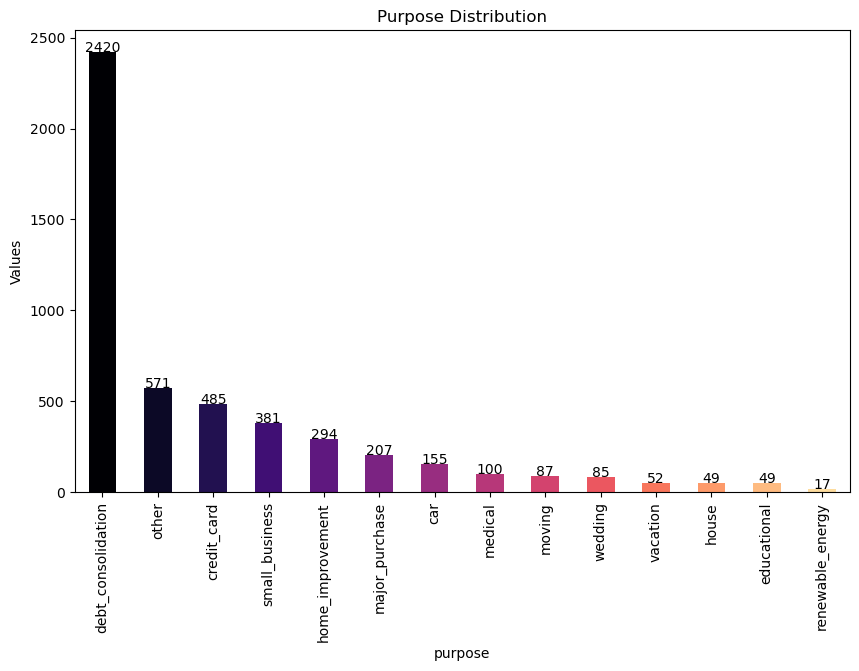

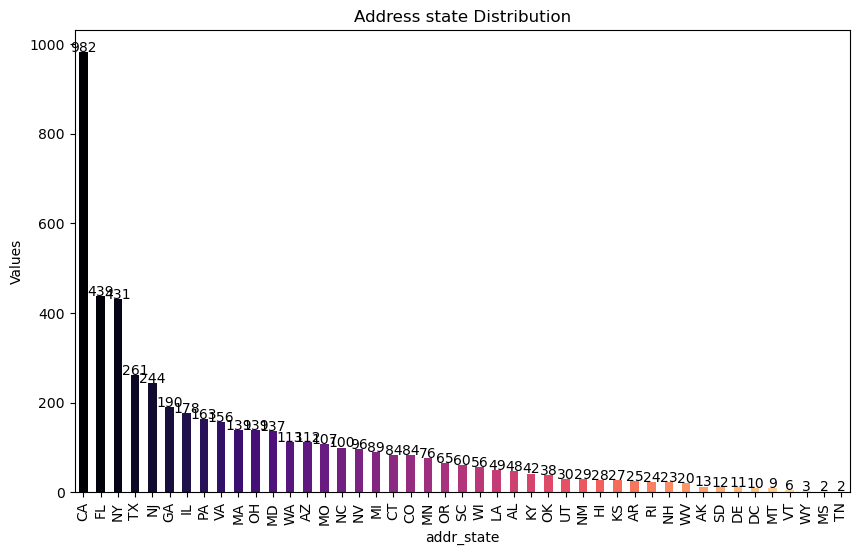

In [48]:
# ploting the bar graph for the column "home_ownership"
create_plot_bar(loan_df_cleaned,column="home_ownership", title='Home Ownership Distribution', xlabel='home_ownership', ylabel='Values')

# ploting the bar graph for the column "verification_status"
create_plot_bar(loan_df_cleaned,column="verification_status", title='Verification Status Distribution', xlabel='verification_status', ylabel='Values')

# ploting the bar graph for the column "loan_status"
create_plot_bar(loan_df_cleaned,column="loan_status", title='loan_status Distribution', xlabel='loan_status', ylabel='Values')

# ploting the bar graph for the column "purpose"
create_plot_bar(loan_df_cleaned,column="purpose", title='Purpose Distribution', xlabel='purpose', ylabel='Values')

# ploting the bar graph for the column "addr_state"
create_plot_bar(loan_df_cleaned,column="addr_state", title='Address state Distribution', xlabel='addr_state', ylabel='Values')

In [49]:
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34362 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             34362 non-null  int64         
 1   funded_amnt           34362 non-null  int64         
 2   funded_amnt_inv       34362 non-null  float64       
 3   term                  34362 non-null  int64         
 4   int_rate              34362 non-null  float64       
 5   installment           34362 non-null  float64       
 6   grade                 34362 non-null  object        
 7   sub_grade             34362 non-null  object        
 8   emp_length            34362 non-null  int32         
 9   home_ownership        34362 non-null  object        
 10  annual_inc            34362 non-null  float64       
 11  verification_status   34362 non-null  object        
 12  issue_d               34362 non-null  datetime64[ns]
 13  loan_status          

#### Creating plots for the following Quantitative variables  of the dataset by filtering based on the loan_status equal to charged off:

annual_inc_bin<br>
loan_amnt_bin<br>
int_rate_bin<br>
dti_bin<br>

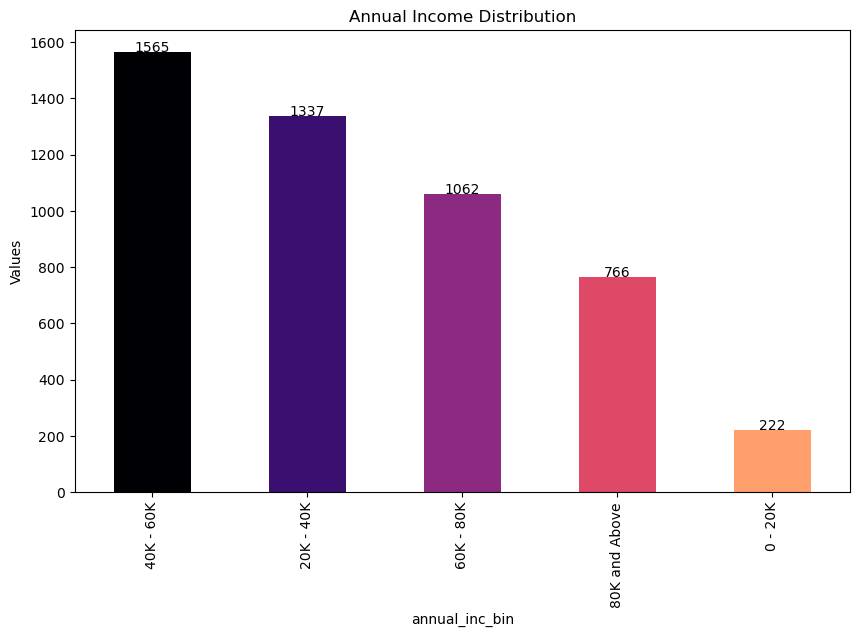

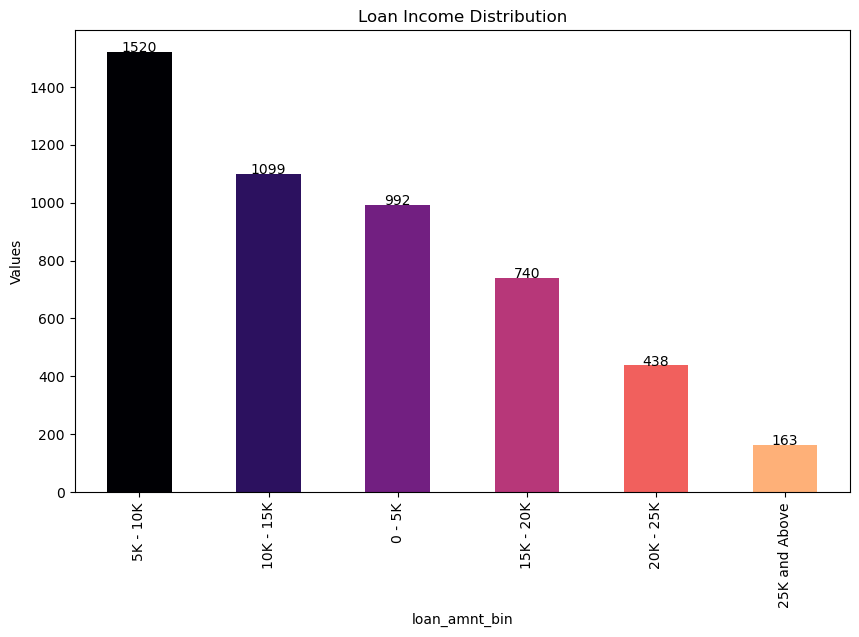

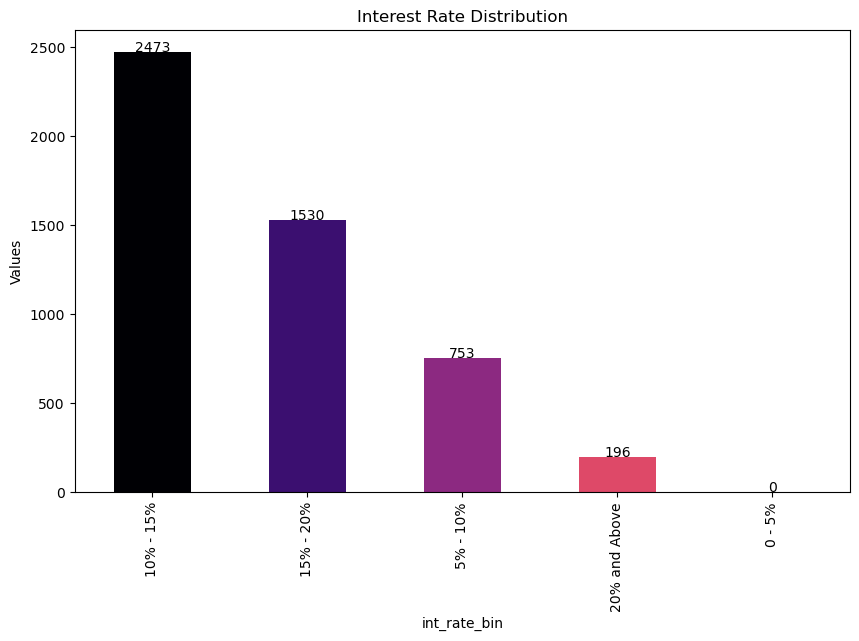

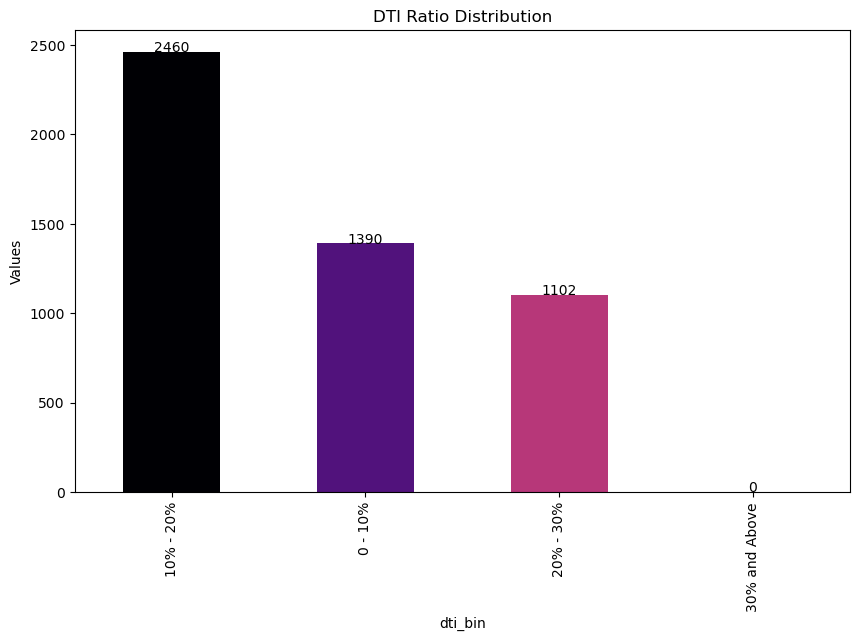

In [50]:
# ploting the bar graph for the column "annual_inc_bin"
create_plot_bar(loan_df_cleaned,column="annual_inc_bin", title='Annual Income Distribution', xlabel='annual_inc_bin', ylabel='Values')

# ploting the bar graph for the column "loan_amnt_bin"
create_plot_bar(loan_df_cleaned,column="loan_amnt_bin", title='Loan Income Distribution', xlabel='loan_amnt_bin', ylabel='Values')

# ploting the bar graph for the column "annual_inc_bin"
create_plot_bar(loan_df_cleaned,column="int_rate_bin", title='Interest Rate Distribution', xlabel='int_rate_bin', ylabel='Values')

# ploting the bar graph for the column "dti_bin"
create_plot_bar(loan_df_cleaned,column="dti_bin", title='DTI Ratio Distribution', xlabel='dti_bin', ylabel='Values')


## Bivariate Analysis

In [51]:
def create_countplot(df,column,title='CountPlot'):
    # Bar plot for bivariate analysis
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')

    # Adding values on top of each bin
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.show()

#### Creating plots for the following Categorical ordered variables  of the dataset Vs Loan_status column:

term<br>
grade<br>
sub_grade<br>
issue_month<br>
issue_year<br>
emp_length<br>


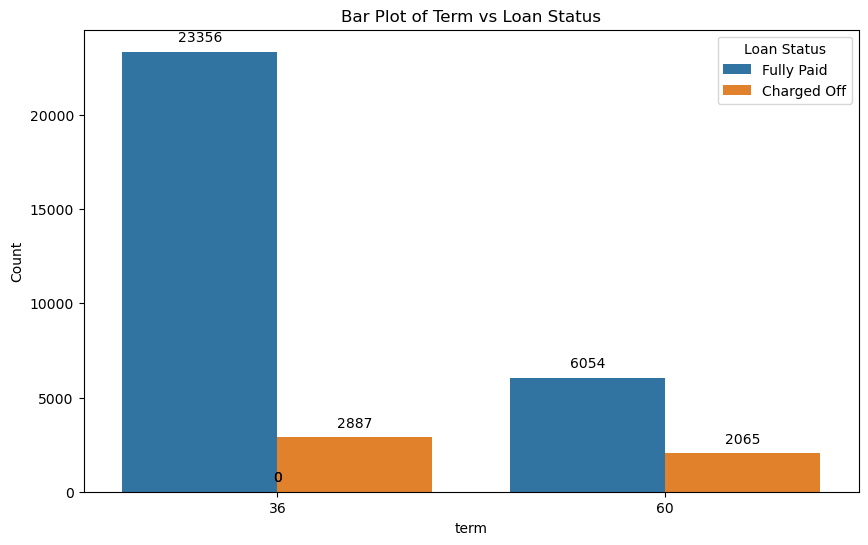

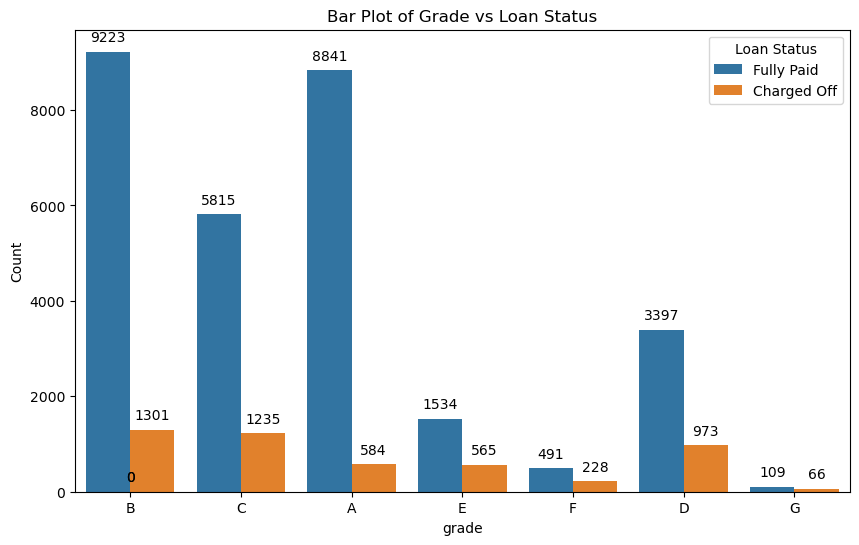

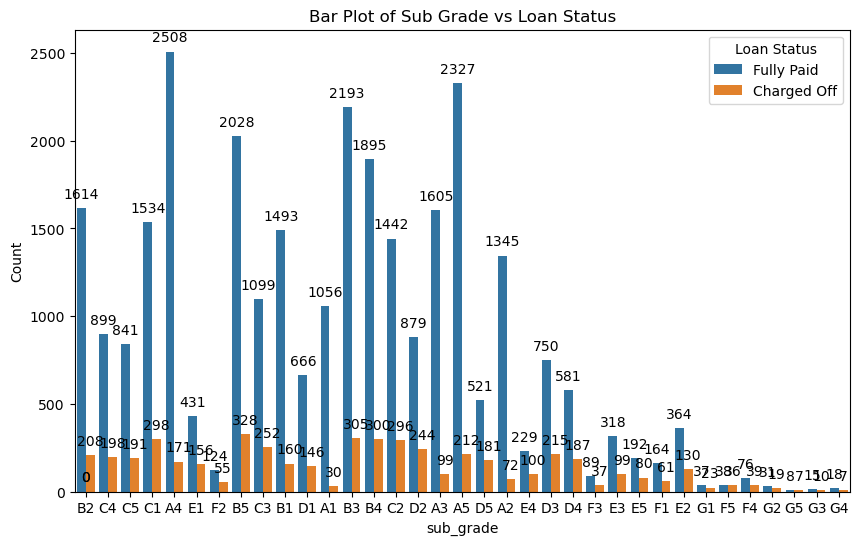

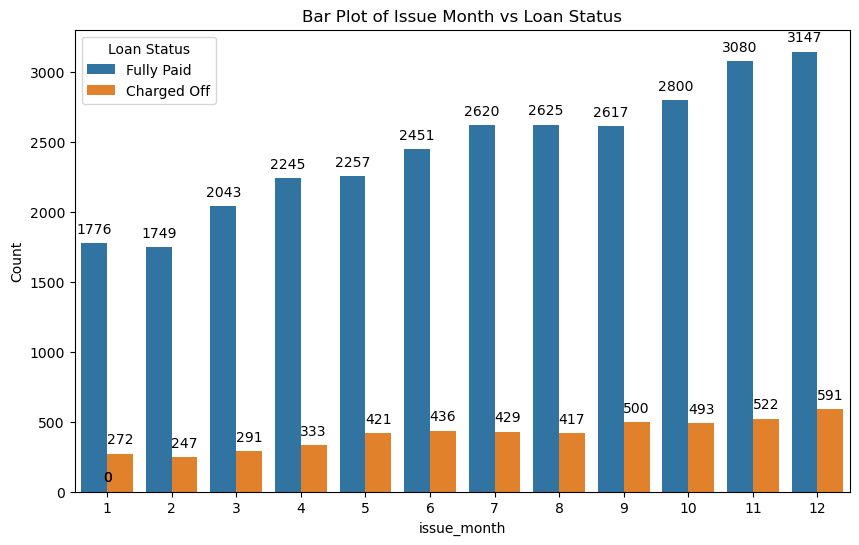

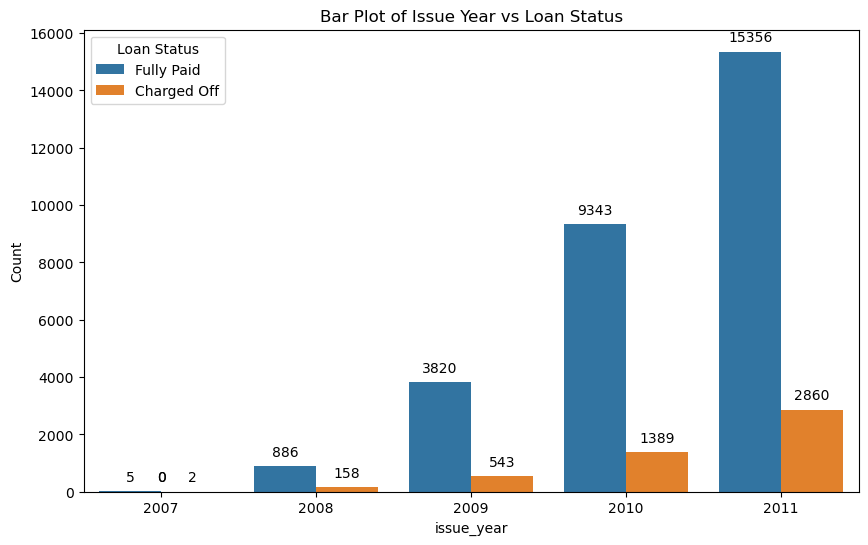

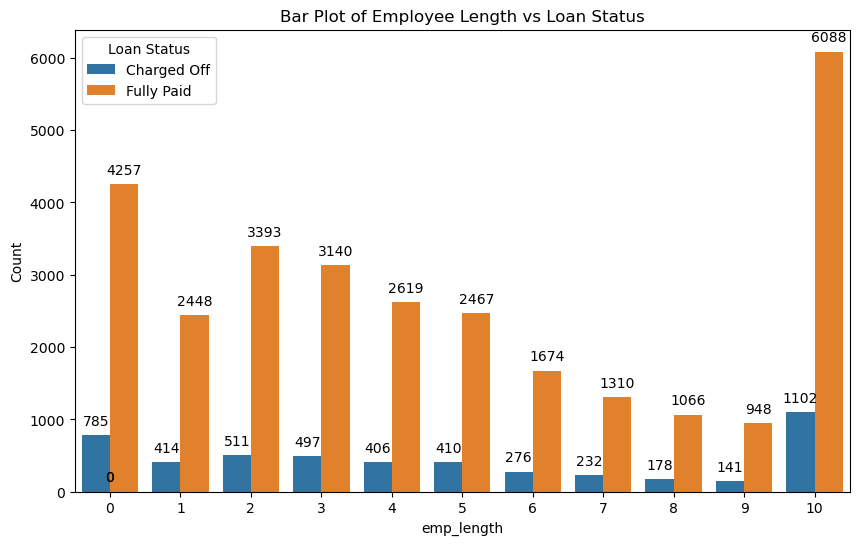

In [52]:
# ploting the countplot graph for the column "term"
create_countplot(loan_df_cleaned, column='term', title='Bar Plot of Term vs Loan Status')

# ploting the countplot graph for the column "grade"
create_countplot(loan_df_cleaned, column='grade', title='Bar Plot of Grade vs Loan Status')

# ploting the countplot graph for the column "sub_grade"
create_countplot(loan_df_cleaned, column='sub_grade', title='Bar Plot of Sub Grade vs Loan Status')

# ploting the countplot graph for the column "issue_month"
create_countplot(loan_df_cleaned, column='issue_month', title='Bar Plot of Issue Month vs Loan Status')

# ploting the countplot graph for the column "issue_year"
create_countplot(loan_df_cleaned, column='issue_year', title='Bar Plot of Issue Year vs Loan Status')

# ploting the countplot graph for the column "emp_length"
create_countplot(loan_df_cleaned, column='emp_length', title='Bar Plot of Employee Length vs Loan Status')


#### Creating plots for the following Categorical ordered variables  of the dataset  Vs Loan_status column:
home_ownership<br>
verification_status<br>
purpose<br>
addr_state<br>

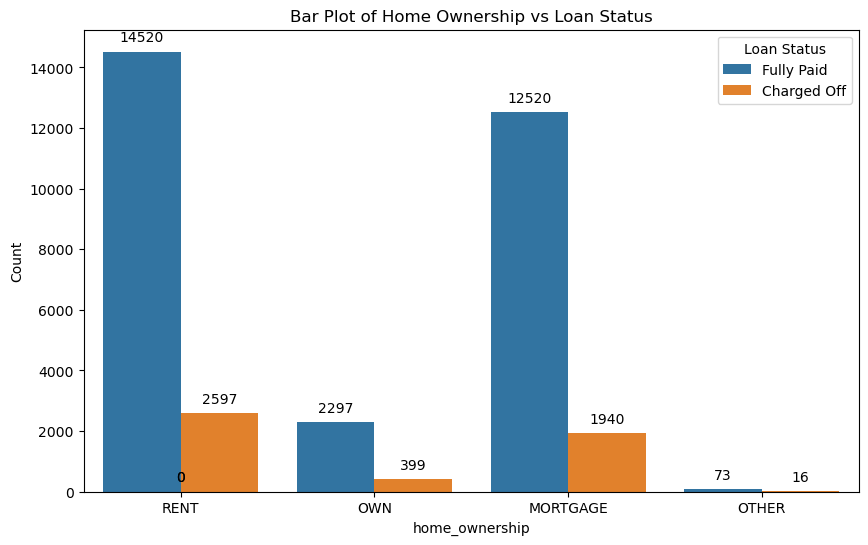

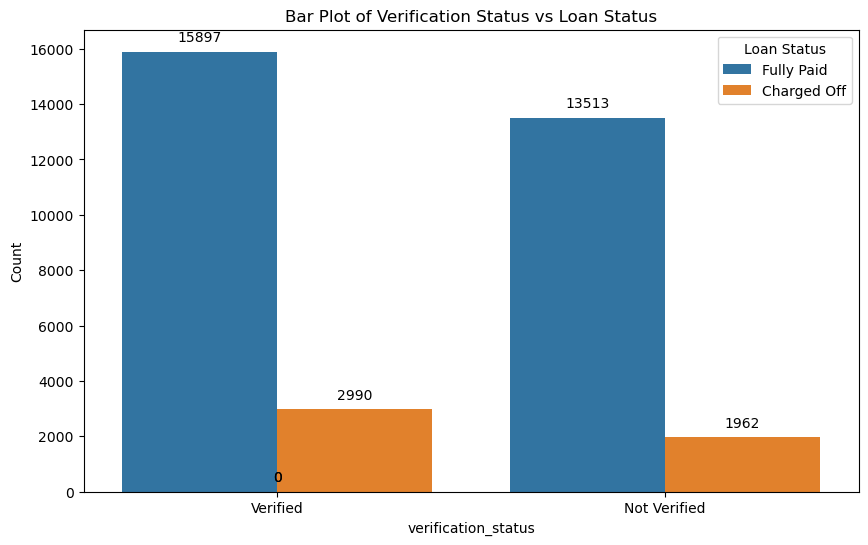

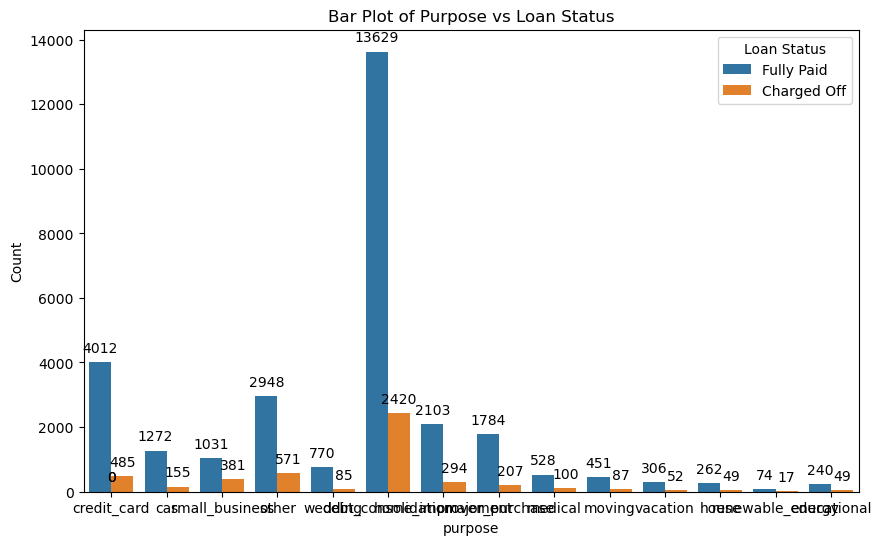

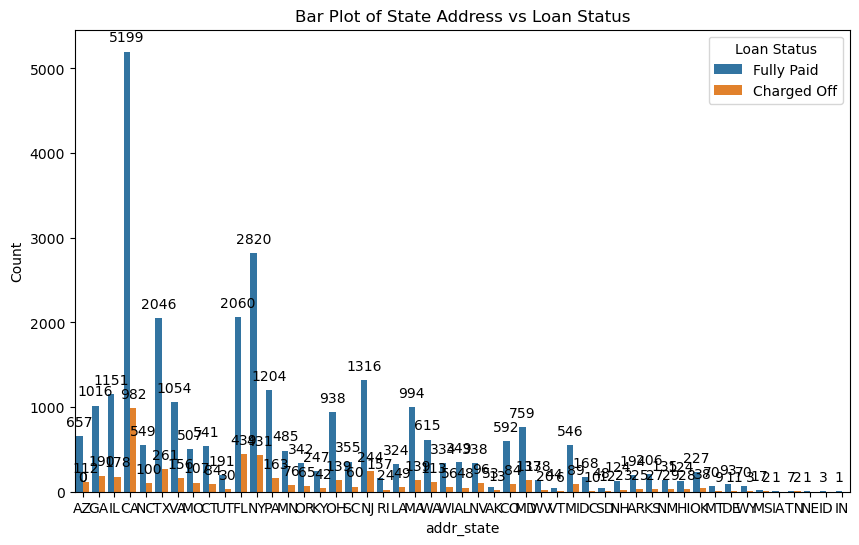

In [53]:
# ploting the countplot graph for the column "home_ownership"
create_countplot(loan_df_cleaned, column='home_ownership', title='Bar Plot of Home Ownership vs Loan Status')

# ploting the countplot graph for the column "verification_status"
create_countplot(loan_df_cleaned, column='verification_status', title='Bar Plot of Verification Status vs Loan Status')

# ploting the countplot graph for the column "sub_grade"
create_countplot(loan_df_cleaned, column='purpose', title='Bar Plot of Purpose vs Loan Status')

# ploting the countplot graph for the column "issue_month"
create_countplot(loan_df_cleaned, column='addr_state', title='Bar Plot of State Address vs Loan Status')

#### Code for analysing two different variables

In [74]:
def create_countplot_1(df,x_value, hue_value, title='CountPlot'):
    # Bar plot for bivariate analysis
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=x_value, hue=hue_value, data=df)
    plt.title(title)
    plt.xlabel(x_value)
    plt.ylabel('Count')
    plt.legend(title=hue_value)

    # Adding values on top of each bin
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.show()

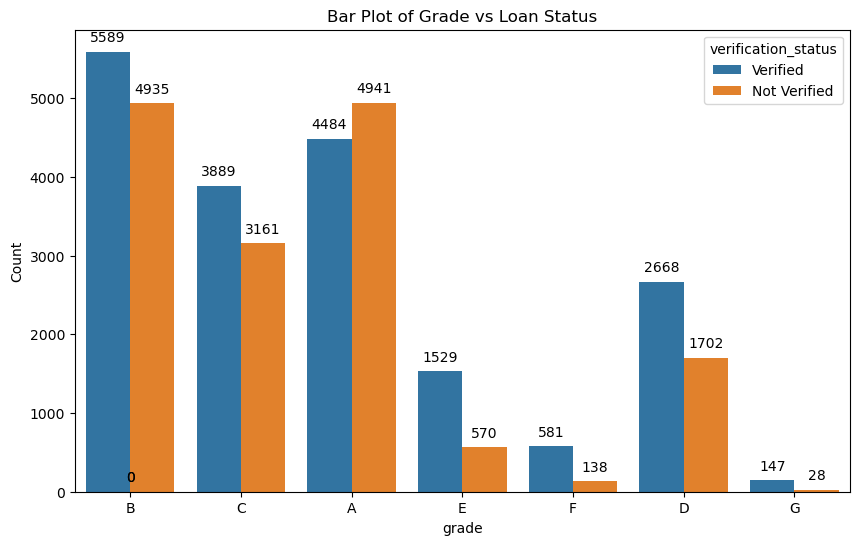

In [85]:
create_countplot_1(loan_df_cleaned, x_value='grade', hue_value='verification_status', title='Bar Plot of Grade vs Loan Status')

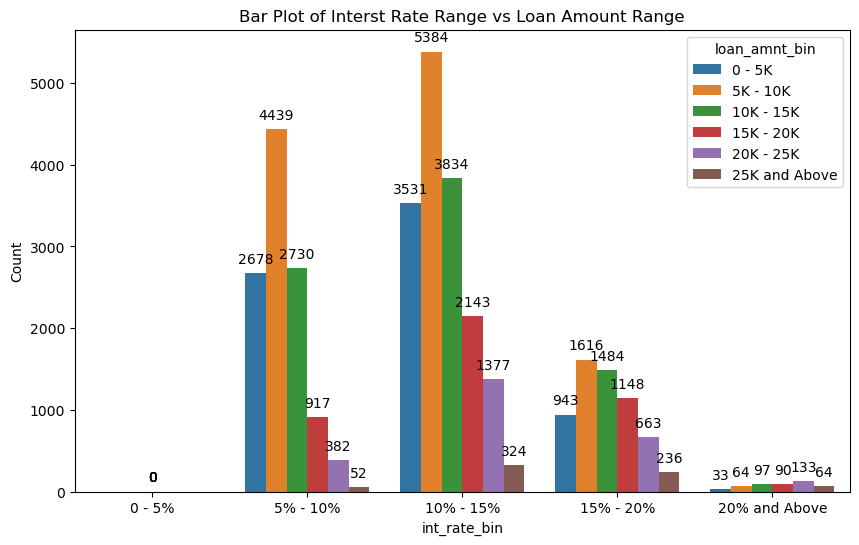

In [83]:
create_countplot_1(loan_df_cleaned, x_value='int_rate_bin', hue_value='loan_amnt_bin', title='Bar Plot of Interst Rate Range vs Loan Amount Range')

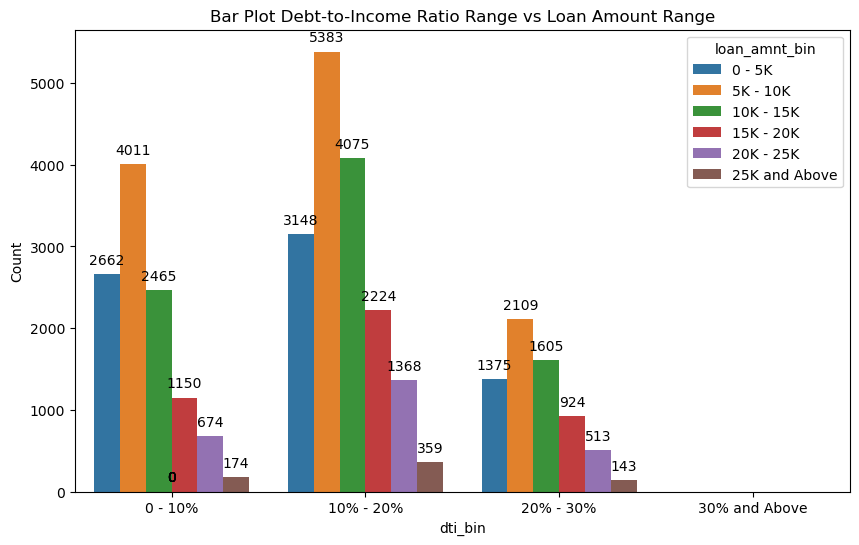

In [84]:
create_countplot_1(loan_df_cleaned, x_value='dti_bin', hue_value='loan_amnt_bin', title='Bar Plot Debt-to-Income Ratio Range vs Loan Amount Range')

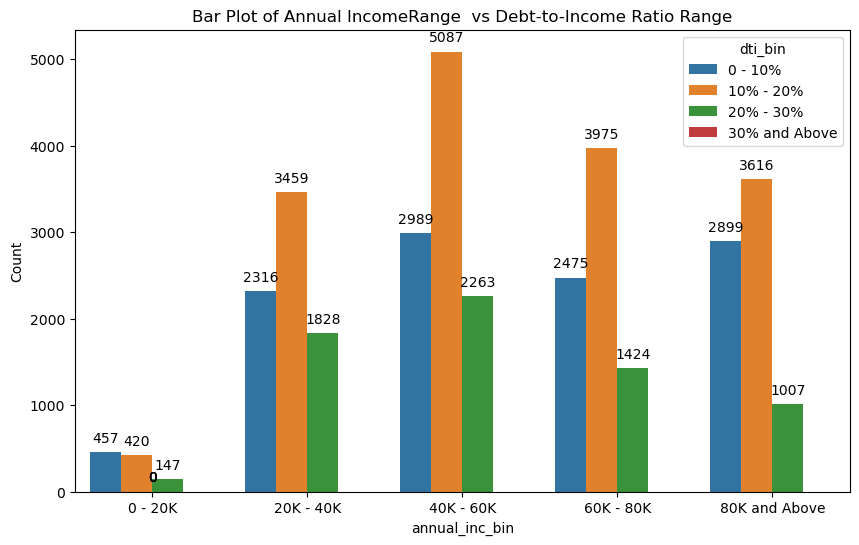

In [81]:
create_countplot_1(loan_df_cleaned, x_value='annual_inc_bin', hue_value='dti_bin', title='Bar Plot of Annual Income Range  vs Debt-to-Income Ratio Range')

In [ ]:
#

Correlation Analysis
Correlation Matrix among variables namely installment, funded_amnt_inv,
funded_amnt, loan_amnt, pub_rec_bankrupticies, annual_inc, emp_length,
dti, int_rate , term

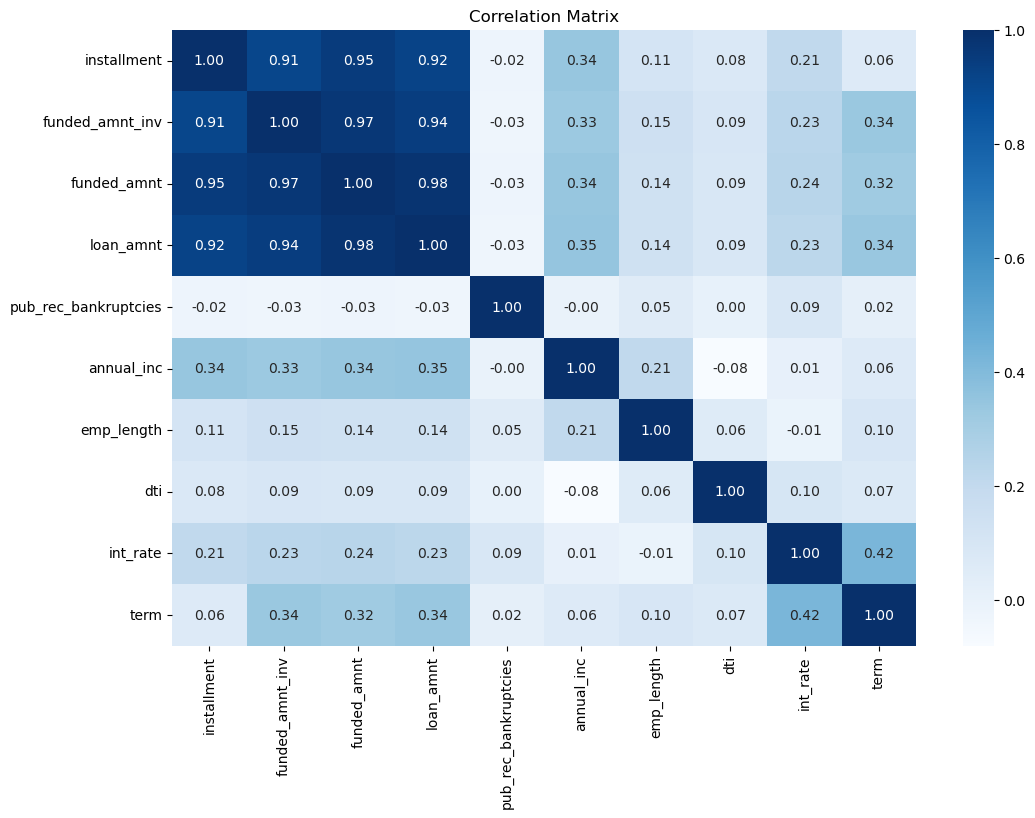

In [70]:
# Extracting the list of columns from the dataframe loan_df_cleaned.
columns_to_extract = [
    'installment', 'funded_amnt_inv', 'funded_amnt', 'loan_amnt',
    'pub_rec_bankruptcies', 'annual_inc', 'emp_length', 'dti', 'int_rate', 'term'
]
extracted_df = loan_df_cleaned[columns_to_extract]

# Creating the cor
correlation_matrix = extracted_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()